In [2]:
import pandas as pd
import numpy as np

dados = pd.read_csv("CC_GENERAL.csv")
dados.drop(columns=['CUST_ID','TENURE'],axis=1,inplace=True)

In [3]:
faltando = dados.isna().sum()
faltando

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [4]:
dados.fillna(dados.median(), inplace=True)
faltando = dados.isna().sum()
faltando

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [5]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dados.values)

In [6]:
from sklearn.cluster import KMeans
# n_clusters = numero de clusters
# n_init = roda 10x seguidas e retorna 10x o mesmo valor
# max_inter = numero maximo de interações
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

Metricas de validação
Externas                    | Internas
precisamos ter os labels    | independente de labels


criterios de validação
Compactação: quão próximo estão os pontos em um mesmo cluster
Separação: quão bem separados estão os pontos em clusters diferentes

Coeficiente de Silhoutte
$$
\begin{equation}
    \begin{aligned}
       s = \frac{b - a}{max(a,b)} \\
       \\
        a &= \text{alpha, distância média entre o ponto e todos os outros pontos do mesmo cluster} \\
        b &= \text{beta , distância média entre o ponto e todos os outros pontos do cluster mais próximo} \\
    \end{aligned}
\end{equation}
$$

Distância Euclidiana
$$
\begin{equation}
    \begin{aligned}
       d(A , B) = \sqrt{(x_{B} - x_{A})^2 + (y_{B} - y_{A})^2} \\
    \end{aligned}
\end{equation}
$$

In [7]:
from sklearn import metrics
labels = kmeans.labels_
silhoutte = metrics.silhouette_score(values,labels,metric='euclidean')
print (silhoutte)
#0.3645139131518675 pode ser considerado um valor bom pois estra entre 1 e -1
# quanto mais proximo de 1 estiver o valor mais separados estão os clusters e melhor compactação

0.36451198422831005


Indice Davies-Bouldin

$$
\begin{equation}
    \begin{aligned}
        DB = \frac{1}{k}  \sum_{k}^{i=1}max R_{ij} \\
       \\
        R_{ij} = \frac{s_{i} + s_{j}}{d_{ij}}\\
        \text{ medida de similaridade entre dois clusters i e j} \\
        \text{ S = distancia média entre cada ponto do cluster e seu centroide}\\
        \text{ D = distancia entre os centroides dos clusters}\\

    \end{aligned}
\end{equation}
$$

In [8]:
dbs = metrics.davies_bouldin_score(values,labels)

#quanto mais proximo de 0 melhor
print(dbs)

1.0754963863506781


Indice Calinski-Harabasz 
leva em consideração a disperção dos pontos dentro de um clusters
$$

\begin{equation}
    \begin{aligned}
        s = \frac{tr(B_{k})}{tr(W_{k})} * \frac{n_{E} - k} {k - 1} \\
    \end{aligned}
\end{equation}
$$
-----------------------------------------------------------------------------------------------------------------
$$

\begin{equation}
    \begin{aligned}
        \frac{tr(B_{k})}{tr(W_{k})} \\


        W_{k} = \sum_{q=1}^{k} \sum_{x ∈ C_{q}}^{} (x - C_{q})(x - C_{q})^{T}
        \\ \\
            
            k     &= \text{número de clusters}\\
            q     &= \text{cluster}\\
            B_{k} &= \text{ dispersão dos elementos entre (between) clusters} \\
            W_{k} &= \text{ dispersão dos elementos dentro (within) clusters} \\

            \\

    \end{aligned}
\end{equation}
      
     

$$



a primeira parte da a razão da disperções dentro do cluster e a disperção entre clusters
$$

\begin{equation}
    \begin{aligned}
        \frac{n_{E} - k} {k - 1} \\


        n_{e} &=  \text{ numero de elementos} \\
        k     &=  \text{numero de clusters} \\


        


    \end{aligned}
\end{equation}
$$
e a segunda parte multiplica esse valor em relação ao numero de clusters e elementos

In [9]:
calinski = metrics.calinski_harabasz_score(values,labels)
#quanto maior o valor melhor
print(calinski)

3431.79476705023


In [10]:
def clustering_algorithm(n_clusters,dataset):
    kmeans = KMeans(n_clusters=n_clusters , n_init=10 , max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset,labels)
    calinski = metrics.calinski_harabasz_score(dataset,labels)
    return s, dbs , calinski

In [11]:
s1, dbs2 , calinski1 = clustering_algorithm(3,values)
print(s1 , dbs , calinski1)

0.3272203126696238 1.0754963863506781 3526.440519908274


In [12]:
s2, dbs3 , calinski2 = clustering_algorithm(5,values)
print(s2 , dbs2 , calinski2)

0.3643891019677421 1.3096073640088426 3431.776631279097


In [13]:
s3, dbs3 , calinski3 = clustering_algorithm(10,values)
print(s3 , dbs3 , calinski3)

0.3054088558411567 1.1544603360093093 3017.7759908325665


In [14]:
random_data = np.random.rand(8950,16)
sRandom , dbRandom , calinskiRandom = clustering_algorithm(5,random_data)
print(sRandom,dbRandom,calinskiRandom)
print(s2 , dbs2 , calinski2)

0.039522456138781026 3.5841750418570655 305.40761650397405
0.3643891019677421 1.3096073640088426 3431.776631279097


In [15]:
set1 ,set2, set3= np.array_split(values,3)
s1 , dbs1 , calinski1 = clustering_algorithm(5,set1)
s2 , dbs2 , calinski2 = clustering_algorithm(5,set2)
s3 , dbs3 , calinski3 = clustering_algorithm(5,set3)

In [16]:
print(s1 , dbs1 , calinski1)
print(s2 , dbs2 , calinski2)
print(s3 , dbs3 , calinski3)

0.36860891867648515 1.056334697944936 1204.111582769171
0.35350840508474196 1.1398820749293481 1194.791527132435
0.36704188760608253 1.0984932613776766 1167.5309516803998


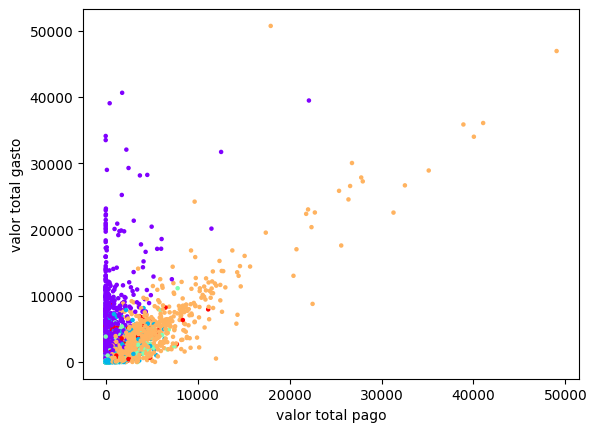

In [17]:
import matplotlib.pyplot as plt
plt.scatter(dados['PURCHASES'],dados['PAYMENTS'],c=labels, s=5 , cmap="rainbow")
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show()

In [18]:
import seaborn as sns
dados['cluster'] = labels
# sns.pairplot(dados[0:], hue="cluster")

In [19]:
dados.groupby("cluster").describe()

BALANCE                                                     
          count         mean          std        min          25%   
cluster                                                             
0        1071.0  1795.836702  1983.632225   0.000000   506.773698  \
1        3281.0   443.767052   846.269966   0.000000    23.390230   
2        2648.0  3038.132314  2479.290949   6.824905  1256.126442   
3        1538.0  1143.712630  1664.669654   0.000000   212.513230   
4         412.0  1987.146873  1852.215743  70.794108  1020.146724   

                                                BALANCE_FREQUENCY             
                 50%          75%           max             count      mean   
cluster                                                                       
0        1088.056301  2317.702916  14581.459140            1071.0  0.861984  \
1          82.980060   411.727643   9630.367575            3281.0  0.774457   
2        2173.994774  4224.605542  18495.558550            2648.0  0.963768   
3         555.745265  1371.943854  19043.138560            1538.0  0.928255   
4        1338.918346  2133.415063  11670.179850             412.0  0.989512   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT             
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       887.346861  21235.065300           1071.0  0.117296  \
1        ...       248.700571   4483.503862           3281.0  0.246761   
2        ...      1330.437428   8345.641905           2648.0  0.001800   
3        ...       524.765832  18621.013310           1538.0  0.278149   
4        ...      7086.774783  76406.207520            412.0  0.019271   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.186974  0.0  0.0  0.083333  0.142857  1.0  
1        0.346705  0.0  0.0  0.000000  0.444444  1.0  
2        0.023264  0.0  0.0  0.000000  0.000000  0.6  
3        0.366934  0.0  0.0  0.083333  0.545455  1.0  
4        0.090795  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [20]:
centroids = kmeans.cluster_centers_
centroids

array([[2.35481987e-01, 2.16532182e-04, 6.00600804e-02, 3.39871776e-02,
        2.60781223e-02, 4.00599972e-01, 5.26908300e-05, 2.04104938e-05,
        3.53115349e-05, 6.55611402e-05, 1.57284062e-03, 1.12114713e-03,
        5.34945073e-01, 5.97780714e-01, 1.04603362e-01, 2.77383565e-05],
       [6.91187945e-02, 2.30816694e-04, 1.21521078e-01, 4.80031635e-02,
        7.36181130e-02, 2.43929836e-02, 1.72835316e-04, 3.36833100e-05,
        1.40285541e-04, 7.93760274e-06, 1.24322926e-04, 2.86353752e-03,
        9.43525517e-01, 1.53887007e-01, 5.68550654e-02, 7.61360874e-05],
       [5.04294070e-01, 2.72242076e-04, 6.17554553e-02, 3.62405829e-02,
        2.55365937e-02, 2.52765717e-01, 6.72943541e-05, 2.57072238e-05,
        4.50409323e-05, 5.74261583e-05, 1.15669149e-03, 1.33139220e-03,
        7.19260678e-01, 1.66160406e-01, 1.79203910e-01, 5.52512128e-07],
       [1.59893172e-01, 2.45101382e-04, 4.38385714e-01, 2.57205740e-01,
        1.81351596e-01, 2.60404572e-02, 2.04213900e-04, 8.903

In [21]:
max = len(centroids[0])
for i in range(max):
    print(dados.columns.values[i],"{:.4f}".format( centroids[:,i].var()))

BALANCE 0.0224
BALANCE_FREQUENCY 0.0000
PURCHASES 0.0197
ONEOFF_PURCHASES 0.0077
INSTALLMENTS_PURCHASES 0.0036
CASH_ADVANCE 0.0226
PURCHASES_FREQUENCY 0.0000
ONEOFF_PURCHASES_FREQUENCY 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 0.0000
CASH_ADVANCE_FREQUENCY 0.0000
CASH_ADVANCE_TRX 0.0000
PURCHASES_TRX 0.0000
CREDIT_LIMIT 0.0360
PAYMENTS 0.0279
MINIMUM_PAYMENTS 0.0542
PRC_FULL_PAYMENT 0.0000


BALANCE  0.0224
PURCHASES 0.0197
CASH_ADVANCE 0.0226
CREDIT_LIMIT 0.0360
PAYMENTS 0.0280

In [22]:
description = dados.groupby("cluster")[["BALANCE","PURCHASES","CASH_ADVANCE","CREDIT_LIMIT","PAYMENTS"]]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description) 


             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS   
cluster                                                                      
0        1795.836702   470.954463   3272.160223   3975.416631  4704.149015  \
1         443.767052   629.212624    141.652025   5129.746043   814.456295   
2        3038.132314   385.096760   1636.114441   4496.336858   968.599396   
3        1143.712630  3274.692952    186.045097   4103.875261  3046.004076   
4        1987.146873   858.326286    420.107194   2226.699029  1338.974045   

         n_clients  
cluster             
0             1071  
1             3281  
2             2648  
3             1538  
4              412  


CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Maior numero de clientes
CLUSTER 1: Clientes que mais gastam. O foco deles é saque. piores pagadores. boa quantidade de clientes
CLUSTER 2: Clientes que gastam muito com compras. melhores pagadores 
CLUSTER 3: Clientes que gastam muito com saques. pagam as vezes
CLUSTER 4: Clientes com o menor limite. não são bom pagadores .menor quantidade de clientes

In [23]:
dados.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1071.0,0.117296,0.186974,0.0,0.0,0.083333,0.142857,1.0
1,3281.0,0.246761,0.346705,0.0,0.0,0.000000,0.444444,1.0
2,2648.0,0.001800,0.023264,0.0,0.0,0.000000,0.000000,0.6
3,1538.0,0.278149,0.366934,0.0,0.0,0.083333,0.545455,1.0
4,412.0,0.019271,0.090795,0.0,0.0,0.000000,0.000000,1.0
